In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

In [3]:
DATA_FOLDER = '../data_raw/'

In [4]:
def load_dataset(path):
    output = pd.read_csv(path, index_col='Id')
    return output

In [5]:
reviews = load_dataset(DATA_FOLDER + "Reviews.csv")
reviews.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
Id,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


(array([5.59908e+05, 5.87600e+03, 1.38500e+03, 5.32000e+02, 2.64000e+02,
        1.11000e+02, 1.02000e+02, 5.30000e+01, 4.60000e+01, 3.30000e+01,
        1.30000e+01, 1.60000e+01, 1.80000e+01, 8.00000e+00, 1.80000e+01,
        6.00000e+00, 7.00000e+00, 2.00000e+00, 0.00000e+00, 5.00000e+00,
        3.00000e+00, 1.00000e+00, 2.00000e+00, 1.00000e+00, 2.00000e+00,
        1.80000e+01, 5.00000e+00, 0.00000e+00, 0.00000e+00, 4.00000e+00,
        1.10000e+01, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  0.  ,  18.46,  36.92,  55.38,  73.84,  92.3 , 110.76, 129.22,
        147.68, 166.14, 184.6 , 203.06, 221.52, 239.98, 258.44, 276.9 ,
        295.36, 313.82, 332.28, 350.74, 369.2 , 387.66, 406.12, 424.58,
        443.04, 461.5 , 479.96, 498.42, 516.88, 535.

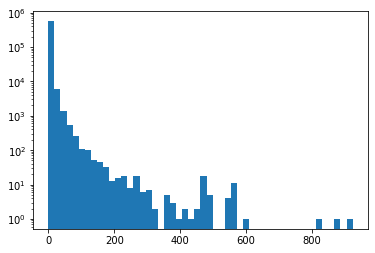

In [9]:
plt.hist(reviews['HelpfulnessDenominator'], log=True, bins=50)

(array([ 52268.,  29769.,  42640.,  80655., 363122.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

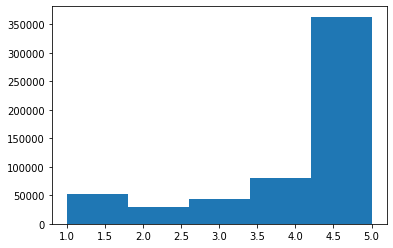

In [7]:
plt.hist(reviews['Score'], bins=5)

(array([ 36275.,  20792.,  29754.,  56042., 250716.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

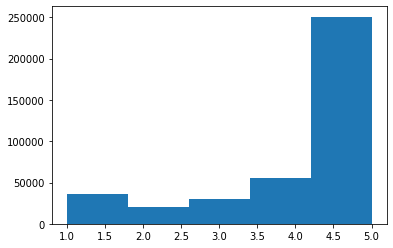

In [10]:
#Drop duplicates
reviews_dropped = reviews.drop_duplicates(subset=['Text'])
plt.hist(reviews_dropped['Score'], bins=5)

In [105]:
reviews_dropped.shape

(393579, 9)

### Now try removing just the 5 star scores to rebalance scores

Remove n:
290498


(array([52268., 29769., 42640., 80655., 72624.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

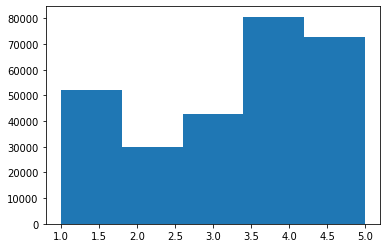

In [112]:
np.random.seed(10)

remove_n = round(0.8*reviews[reviews['Score']==5].shape[0])
print('Remove n:')
print(remove_n)

drop_indices = np.random.choice(reviews[reviews['Score']==5].index, remove_n, replace=False)
reviews_balanced = reviews.drop(drop_indices)

plt.hist(reviews_balanced['Score'], bins=5)

It gave a similar result to normal regression on full dataset

### Resampling

In [11]:
max_class = reviews.Score.value_counts().values[0]
print(max_class)

363122


(array([363122.,      0., 363122.,      0., 363122.,      0., 363122.,
             0., 363122.]),
 array([1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
        3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ]),
 <BarContainer object of 9 artists>)

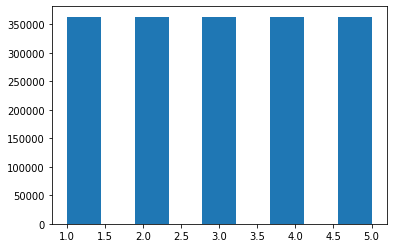

In [12]:
try:
    reviews_upsampled = pd.read_csv('../data_processed/Reviews_upsampled.csv')
except:
    reviews_1 = reviews[reviews['Score']==1]
    reviews_2 = reviews[reviews['Score']==2]
    reviews_3 = reviews[reviews['Score']==3]
    reviews_4 = reviews[reviews['Score']==4]
    reviews_5 = reviews[reviews['Score']==5]

    reviews_1_upsampled = resample(reviews_1, n_samples=max_class, random_state=123)
    reviews_2_upsampled = resample(reviews_2, n_samples=max_class, random_state=123)
    reviews_3_upsampled = resample(reviews_3, n_samples=max_class, random_state=123)
    reviews_4_upsampled = resample(reviews_4, n_samples=max_class, random_state=123)

    reviews_upsampled = pd.concat([reviews_1_upsampled, 
                                   reviews_2_upsampled, 
                                   reviews_3_upsampled, 
                                   reviews_4_upsampled, 
                                   reviews_5])

    reviews_upsampled.to_csv('../data_processed/Reviews_upsampled.csv')
plt.hist(reviews_upsampled['Score'],bins=9)